ВВЕДЕНИЕ
Цель работы: изучение связи между признаками двумерного набора данных, визуализация данных.
Ссылка на ноутбук: https://github.com/VyborovAndrey/Data-Analysis-GUAP
	Вариант 1: 
Набор данных salary.csv
Задание 1. Использовать seaborn. По группировке - work_year и количество компаний каждого размера построить диаграмму.
Задание 2. Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю зарплату в usd по должностям (job_title). Сделать линию красной, шириной 6 и отобразить маркеры в виде точек.
Задание 3. Использовать matplotlib. Построить круговую диаграмму, которая отображает процент компаний каждого размера.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

В начале работы был прочитан csv файл с заданием и была осуществлена предобработка данных так же, как и в лабораторной работе №1.

In [2]:
df_salary = pd.read_csv('salary2.csv',sep=';', index_col=False)
df_salary.head(20)

,work_year,employment_type,job_title,salary,salary_in_usd,employee_residence,company_location,company_size,exp_all,exp
0,2020.0,FT,Data SCIENTIST,70000.0,79833.0,DE,DE,L,9,4
1,2020.0,FT,Product Data Analyst,20000.0,20000.0,HN,HN,S,2,2
2,2020.0,FT,Data Analyst,72000.0,72000.0,US,US,L,13,3
3,2020.0,FT,Data Scientist,11000000.0,35735.0,HU,HU,L,60,6
4,2020.0,FT,Data Scientist,45000.0,51321.0,FR,FR,S,8,4
5,2020.0,FT,Data Scientist,3000000.0,40481.0,IN,IN,L,53,1
6,2020.0,FT,Data Scientist,35000.0,39916.0,FR,FR,M,6,2
7,2020.0,FT,Data Analyst,85000.0,85000.0,US,US,L,15,2
8,2020.0,FT,Data Analyst,8000.0,8000.0,PK,PK,Large,1,4
9,2020.0,FT,Data Engineer,4450000.0,41689.0,JP,JP,S,50,5


In [3]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           401 non-null    float64
 1   employment_type     401 non-null    object 
 2   job_title           401 non-null    object 
 3   salary              398 non-null    float64
 4   salary_in_usd       401 non-null    float64
 5   employee_residence  401 non-null    object 
 6   company_location    401 non-null    object 
 7   company_size        401 non-null    object 
 8   exp_all             401 non-null    int64  
 9   exp                 401 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 31.5+ KB


Как мы видим, по сравнению с первой лабораторной работой в датасете появились два стобца: exp и exp_all. Они обозначают опыт работы и опыт работы на предыдущем месте работы соответственно.

In [4]:
df_salary['salary'] = df_salary['salary'].fillna(df_salary['salary_in_usd'])

In [5]:
df_salary['work_year'] = df_salary['work_year'].astype('int32')

In [6]:
df_salary = df_salary.replace('Data AnalyticsManager', 'Data Analytics Manager')
df_salary = df_salary.replace(dict.fromkeys(['Data SCIENTIST', 'DataScientist'], 'Data Scientist'))

In [7]:
df_salary['company_size'] = df_salary['company_size'].replace(to_replace='Large', value='L')

In [8]:
df_salary = df_salary.drop_duplicates()

array([[<Axes: xlabel='work_year', ylabel='work_year'>,
        <Axes: xlabel='salary_in_usd', ylabel='work_year'>,
        <Axes: xlabel='exp_all', ylabel='work_year'>,
        <Axes: xlabel='exp', ylabel='work_year'>],
       [<Axes: xlabel='work_year', ylabel='salary_in_usd'>,
        <Axes: xlabel='salary_in_usd', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp_all', ylabel='salary_in_usd'>,
        <Axes: xlabel='exp', ylabel='salary_in_usd'>],
       [<Axes: xlabel='work_year', ylabel='exp_all'>,
        <Axes: xlabel='salary_in_usd', ylabel='exp_all'>,
        <Axes: xlabel='exp_all', ylabel='exp_all'>,
        <Axes: xlabel='exp', ylabel='exp_all'>],
       [<Axes: xlabel='work_year', ylabel='exp'>,
        <Axes: xlabel='salary_in_usd', ylabel='exp'>,
        <Axes: xlabel='exp_all', ylabel='exp'>,
        <Axes: xlabel='exp', ylabel='exp'>]], dtype=object)

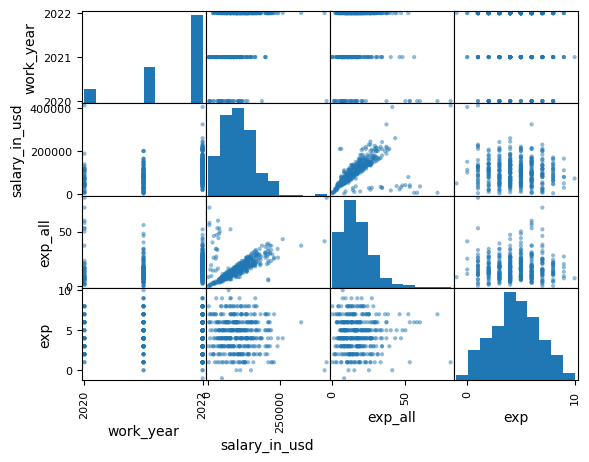

In [9]:
pd.plotting.scatter_matrix(df_salary.drop(['salary'], axis=1))

Из данных точечных диаграмм можно сделать вывод, что опыт работы и зарплата имеют прямую корреляцию, как и год выплаты заработной платы и зарплата. Осталные переменные не имеют чёткой коррелляции.

<Axes: xlabel='exp_all', ylabel='salary_in_usd'>

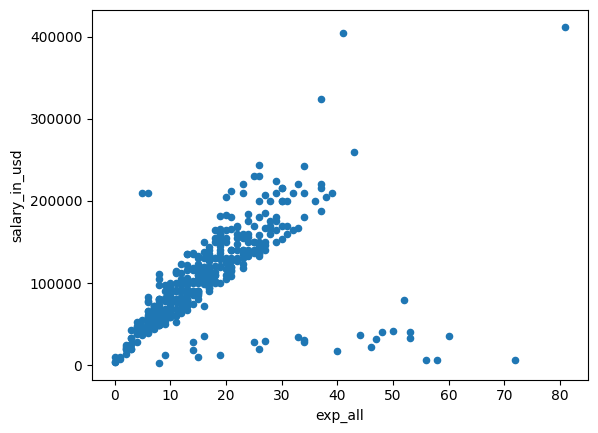

In [10]:
df_salary.plot(x="exp_all", y="salary_in_usd", kind="scatter")

Из данной точечной диаграммы можно вновь сделать вывод, что общий опыт работы и зарплата имеют прямую зависимость. Также можно утверждать, что есть достаточно значимое количество работников, получающих примерно одинаковую заработную плату(~30000) вне зависимости от опыта. Также есть несколько потенциальных выбросов, имеющих слишком большой опыт работы.

In [11]:
df_salary.corrwith(df_salary["salary_in_usd"], numeric_only=True)

work_year        0.333551
salary          -0.091621
salary_in_usd    1.000000
exp_all          0.495942
exp             -0.076138
dtype: float64

Коэффиценты корреляции подтверждают тезисы, высказанные выше: имеется прямая корреляция между опытом работы и зарплатой, годом выплаты заработной платы и зарплаты.

<Axes: xlabel='company_size', ylabel='job_title'>

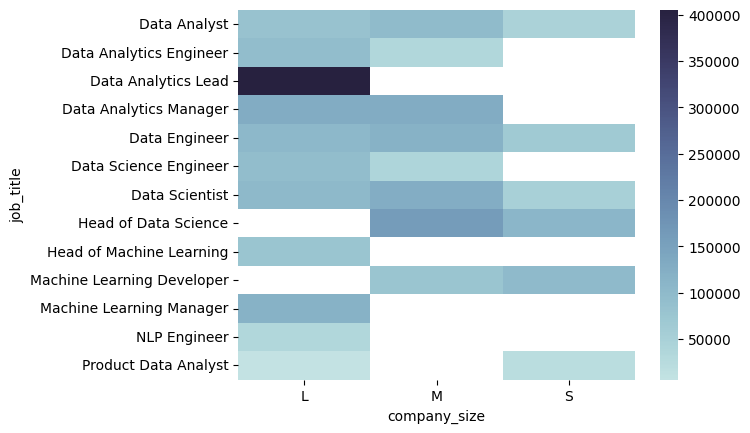

In [12]:
glue = df_salary.pivot_table(index="job_title", columns="company_size", values="salary_in_usd")
sns.heatmap(glue, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

К сожалению, данных не хватает для того, чтобы полностью заполнить тепловую карту. Но мы можем утверждать, что в больших компаниях работники на разных событиях в среднем получают похожую заработную плату. 

Задание 1: Использовать seaborn. По группировке - work_year и количество компаний каждого
размера построить диаграмму следующего вида:

<Axes: xlabel='Год', ylabel='Количество компаний'>

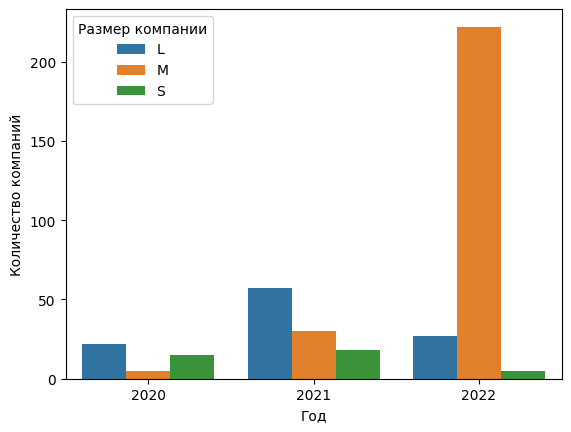

In [13]:
glue = df_salary.groupby(["work_year", "company_size"])['salary_in_usd'].count()
glue = glue.to_frame('Количество компаний').reset_index()
glue = glue.rename(columns={'work_year': 'Год', 'company_size': 'Размер компании'}).reset_index()
sns.barplot(data=glue, hue='Размер компании', x='Год', y='Количество компаний')

Исходя из гистограммы можно утверждать, что выборка в разных годах была собрана очень неравномерно. Так, в 2020 году было собрано очень мало данных по компаниям M размера, а в 2022 году это число вырасло в дестятки раз.

Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю
зарплату в usd по должностям (job_title). Сделать линию красной, шириной 6 и отобразить маркеры в
виде точек.

<Axes: title={'center': 'График средней заработной платы по должностям'}, xlabel='Должность', ylabel='Заработная плата'>

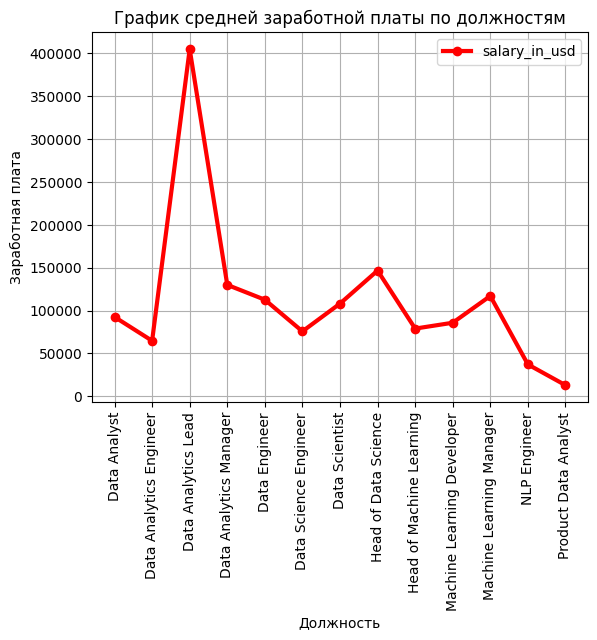

In [14]:
glue = df_salary.pivot_table(index='job_title', values='salary_in_usd', aggfunc='mean')
glue = glue.reset_index()
tick = [i for i in range(df_salary.pivot_table(index='job_title', values='salary_in_usd', aggfunc='mean').size)]
glue.plot(x='job_title', y='salary_in_usd', title="График средней заработной платы по должностям", ylabel="Заработная плата", xlabel='Должность', rot=90, lw=3, grid=True, style='-o', color='red', xticks=tick)

На графике видно, что самую большую среднюю зарплату получают Data Analytics Lead, а самую маленькую - Product Data Analyst.

Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент
компаний каждого размера.

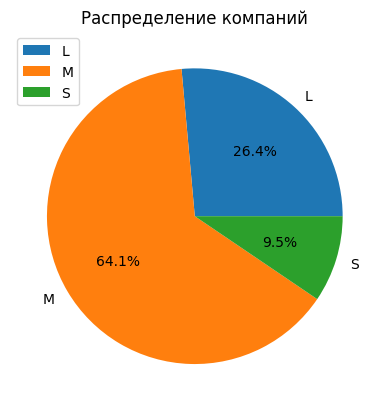

In [15]:
df_salary.groupby('company_size')['exp'].count().rename("").plot.pie(autopct='%1.1f%%', title='Распределение компаний')
plt.legend()

Круговая диаграмма показывает распределение сотрудников в зависимости от размера компании. В данной выборке большинство сотрудников в работает в компаниях среднего размера. Если выборка осуществлялась случайным образом, то мы можем сказать то же самое и про всех сотрудников.

ВЫВОД
В ходе работы был произведён анализ и изучение связей между признаками двумерного набора данных по заработной плате, а также была произведена визуализация данных с помощью гистограмм, диаграмм рассеяния, круговых и диаграмм. Была выявлена прямая зависимость между опытом работы и заработной платой, годом выплаты заработной платы и зарплатой.

In [57]:
import matplotlib
np.histogram(df_salary['salary_in_usd'].values, bins=10)

(array([ 51, 103, 112,  83,  29,  19,   1,   1,   0,   2], dtype=int64),
 array([  2859. ,  43773.1,  84687.2, 125601.3, 166515.4, 207429.5,
        248343.6, 289257.7, 330171.8, 371085.9, 412000. ]))

Дополнительное задание №1. Построить boxplot для зарплаты и должности.

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

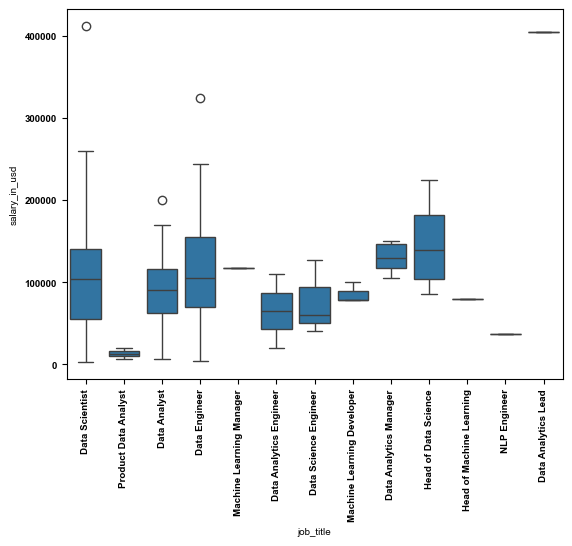

In [88]:
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = 11.7,8.27
sns.set(font_scale=1.3)
sns.boxplot(data=df_salary, x='job_title', y='salary_in_usd')

На "ящике с усами" легко можно понять, форму распределения каждого кейса, а также выбросы. Например, можно сказать, что самый большой разброс у Data Scientist. А у DA Lead, NLP engineer, ML manager, Head of ML выборка всего из одного сотрудника. 

Дополнительное задание №2. Построить boxplot для опыта и года выплаты зарплаты.

<Axes: xlabel='work_year', ylabel='exp_all'>

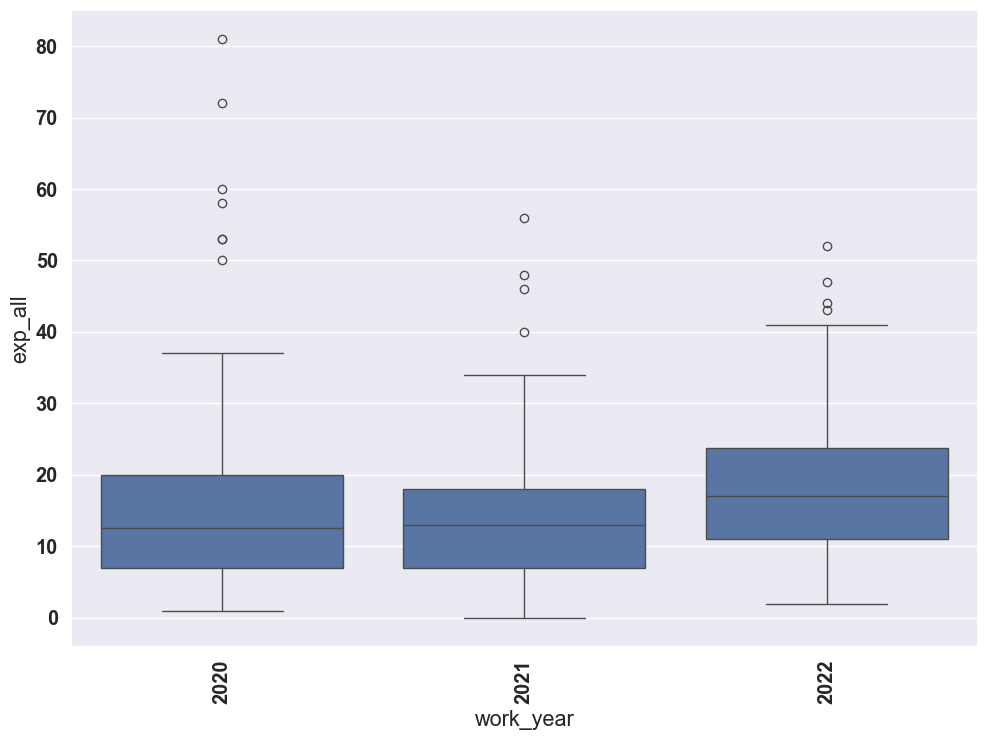

In [89]:
plt.xticks(rotation=90)
sns.set(font_scale=1.3)
sns.boxplot(data=df_salary, x='work_year', y='exp_all')

На данном графике видно, что в 2020 году выборка имела большое количество выбросов по общему опыту. А также то, что первый и третий квартиль опыта в 2022 году выросли по сравнению с 2020 годом. 

Задание №3 построить матрицы ковариации и корреляции с группировкой по году работы.

In [90]:
df_salary.groupby('work_year').corr(numeric_only=True)

salary  salary_in_usd   exp_all       exp
work_year                                                           
2020      salary         1.000000      -0.124336  0.493895  0.082116
          salary_in_usd -0.124336       1.000000  0.330417 -0.178063
          exp_all        0.493895       0.330417  1.000000  0.051677
          exp            0.082116      -0.178063  0.051677  1.000000
2021      salary         1.000000      -0.116267  0.405642  0.029674
          salary_in_usd -0.116267       1.000000  0.219877 -0.137070
          exp_all        0.405642       0.219877  1.000000  0.015623
          exp            0.029674      -0.137070  0.015623  1.000000
2022      salary         1.000000       0.026561  0.395666  0.049208
          salary_in_usd  0.026561       1.000000  0.727654 -0.025094
          exp_all        0.395666       0.727654  1.000000  0.006156
          exp            0.049208      -0.025094  0.006156  1.000000

In [91]:
df_salary.groupby('work_year').cov(numeric_only=True)

salary  salary_in_usd       exp_all  \
work_year                                                            
2020      salary         3.378395e+12  -1.525415e+10  1.861089e+07   
          salary_in_usd -1.525415e+10   4.455234e+09  4.521421e+05   
          exp_all        1.861089e+07   4.521421e+05  4.202956e+02   
          exp            3.194332e+05  -2.515381e+04  2.242160e+00   
2021      salary         8.892024e+12  -1.599411e+10  1.236967e+07   
          salary_in_usd -1.599411e+10   2.128160e+09  1.037280e+05   
          exp_all        1.236967e+07   1.037280e+05  1.045755e+02   
          exp            1.852809e+05  -1.324012e+04  3.345238e-01   
2022      salary         1.652730e+11   5.970942e+08  1.444619e+06   
          salary_in_usd  5.970942e+08   3.057664e+09  3.613624e+05   
          exp_all        1.444619e+06   3.613624e+05  8.065781e+01   
          exp            3.978429e+04  -2.759535e+03  1.099561e-01   

                                   exp  
work_year                               
2020      salary         319433.222997  
          salary_in_usd  -25153.808362  
          exp_all             2.242160  
          exp                 4.479094  
2021      salary         185280.900824  
          salary_in_usd  -13240.121703  
          exp_all             0.334524  
          exp                 4.384249  
2022      salary          39784.290809  
          salary_in_usd   -2759.535309  
          exp_all             0.109956  
          exp                 3.954997

Из таблиц можно сделать вывод, что корреляция между зарплатой и общим опытом падает.

Задание №3 Построить scatter matrix в matplotlib

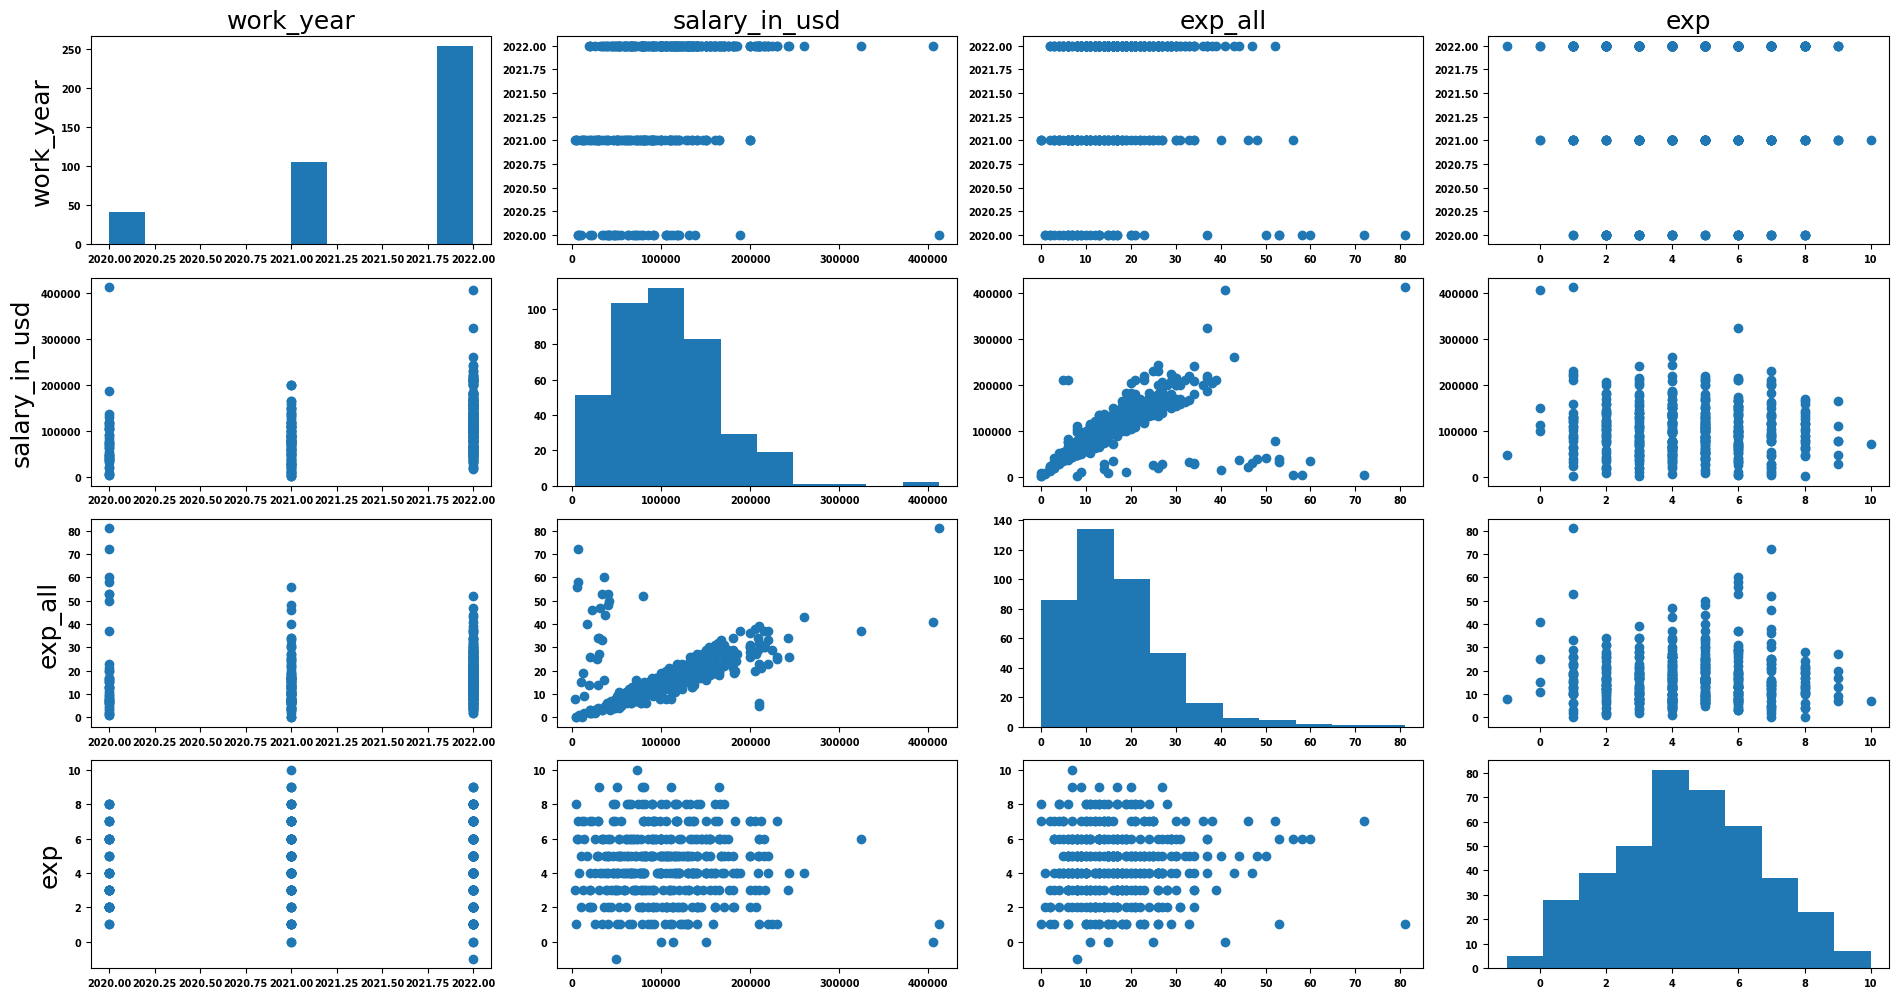

In [87]:
font = {'weight' : 'bold',
        'size'   : 7}

matplotlib.rc('font', **font)


fig, axs = plt.subplots(4, 4)
fig.set_figheight(10)
fig.set_figwidth(19)
title = df_salary.drop(['salary'], axis=1).select_dtypes((int, float, np.int64)).columns
for n, i in enumerate(title):
  for m, j in enumerate(title):
    if  n == m:
      Height, X = np.histogram(df_salary[i].values, bins=10)
      axs[m, n].hist(x=df_salary[i])
    else:
      axs[m, n].scatter(x=df_salary[i].values, y=df_salary[j].values)
for n, i in enumerate(title):
        axs[0, n].set_title(i, fontsize=18)
        axs[n, 0].set_ylabel(i, fontsize=18)
plt.tight_layout()

Данная матрица повторяет ранее построенную, но она построена с помощью библиотеки matplotlib.